<center style><h1>Computer Assignment 5 Phase 1</h1></center>
<center style><h1>Neural Networks</h1></center>

**In this assignment we are given some pictures in 10 different classes. We are about to classify these pictures
using Feed Forward in Neural Networks.**

## Review Data and PreProcess

* Each pixel is having a value in range of 0 to 255
* If we no scale our values we might face values with different measure scales and this can cause harm calculation

In [1]:
import cv2
import random
import pandas
from sklearn.model_selection import train_test_split

labels = pandas.read_csv('cifar_dataset/labels.csv')
train, test = train_test_split(labels, test_size=0.2)

choice = random.randint(0, len(train))
img = cv2.imread(f'cifar_dataset/data/{train.iloc[choice].id}.png')
print(img)
print(f'Max = {img.max()}')
print(f'Min = {img.min()}')

[[[12 28 30]
  [16 43 48]
  [24 47 52]
  ...
  [32 32 39]
  [36 35 36]
  [35 34 36]]

 [[12 34 38]
  [19 45 50]
  [35 55 58]
  ...
  [38 35 37]
  [39 35 38]
  [37 35 38]]

 [[15 38 43]
  [39 67 71]
  [72 91 93]
  ...
  [39 37 39]
  [41 36 39]
  [39 36 39]]

 ...

 [[34 29 23]
  [28 24 19]
  [30 26 17]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[27 23 16]
  [25 20 13]
  [28 23 15]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[22 18 11]
  [22 16 12]
  [20 17 12]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
Max = 216
Min = 0


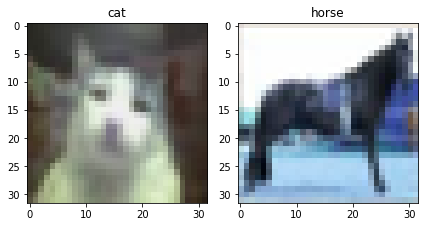

In [2]:
from matplotlib import pyplot as plot

pictures = []
categories = ['cat', 'horse']

while len(categories) != 0:
    rand_pic = random.randint(0, len(train))
    l = str(train.iloc[rand_pic].label)
    if l in categories:
        pictures.append(rand_pic)
        categories.remove(train.iloc[rand_pic].label)

plot.figure()

for i in range(2):
    plot.subplot(1, 2, i + 1)
    image = cv2.imread(f'cifar_dataset/data/{train.iloc[pictures[i]].id}.png')
    plot.imshow(image)
    plot.title(train.iloc[pictures[i]].label)

plot.tight_layout()
plot.show()

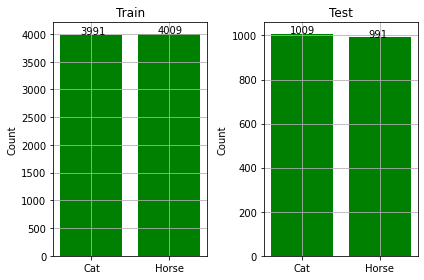

In [3]:
plot.figure()

plot.subplot(1, 2, 1)
bars = plot.bar(['Cat', 'Horse'], [train['label'].value_counts()['cat'], train['label'].value_counts()['horse']], color='c')
plot.ylabel('Count')
plot.title('Train')
plot.grid()
for bar in bars:
    y_val = bar.get_height()
    plot.text(bar.get_x() + 0.25, y_val + 1, y_val)

plot.subplot(1, 2, 2)
bars = plot.bar(['Cat', 'Horse'], [test['label'].value_counts()['cat'], test['label'].value_counts()['horse']], color='c')
plot.ylabel('Count')
plot.title('Test')
plot.grid()
for bar in bars:
    y_val = bar.get_height()
    plot.text(bar.get_x() + 0.25, y_val + 1, y_val)

plot.tight_layout()
plot.show()

In [4]:
import numpy

def normalize_data(data):
    return (data - numpy.min(data)) / (numpy.max(data) - numpy.min(data))


img = normalize_data(img)
print(img)
print(f'Max = {img.max()}')
print(f'Min = {img.min()}')

[[[0.05555556 0.12962963 0.13888889]
  [0.07407407 0.19907407 0.22222222]
  [0.11111111 0.21759259 0.24074074]
  ...
  [0.14814815 0.14814815 0.18055556]
  [0.16666667 0.16203704 0.16666667]
  [0.16203704 0.15740741 0.16666667]]

 [[0.05555556 0.15740741 0.17592593]
  [0.08796296 0.20833333 0.23148148]
  [0.16203704 0.25462963 0.26851852]
  ...
  [0.17592593 0.16203704 0.1712963 ]
  [0.18055556 0.16203704 0.17592593]
  [0.1712963  0.16203704 0.17592593]]

 [[0.06944444 0.17592593 0.19907407]
  [0.18055556 0.31018519 0.3287037 ]
  [0.33333333 0.4212963  0.43055556]
  ...
  [0.18055556 0.1712963  0.18055556]
  [0.18981481 0.16666667 0.18055556]
  [0.18055556 0.16666667 0.18055556]]

 ...

 [[0.15740741 0.13425926 0.10648148]
  [0.12962963 0.11111111 0.08796296]
  [0.13888889 0.12037037 0.0787037 ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.125      0.10648148 0.07407407]
  [0.11574074 0.09259259 0.06018519]
